<a href="https://colab.research.google.com/github/keerthanaasri/FI_ML_3/blob/main/FI3_Image_Classificatoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training samples: (50000, 32, 32, 3), Test samples: (10000, 32, 32, 3)
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 258s 326ms/step - accuracy: 0.3399 - loss: 1.7790 - val_accuracy: 0.5814 - val_loss: 1.1549
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 264s 328ms/step - accuracy: 0.5952 - loss: 1.1348 - val_accuracy: 0.6694 - val_loss: 0.9375
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 248s 311ms/step - accuracy: 0.6662 - loss: 0.9478 - val_accuracy: 0.7098 - val_loss: 0.8267
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 285s 340ms/step - accuracy: 0.7051 - loss: 0.8434 - val_accuracy: 0.7346 - val_loss: 0.7555
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 246s 314ms/step - accuracy: 0.7347 - loss: 0.7546 - val_accuracy: 0.7477 - val_loss: 0.7230
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 265s 319ms/step - accuracy: 0.7504 - loss: 0.7065 - val_accuracy: 0.7595 - val_loss: 0.7027
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 265s 323ms/step - accuracy: 0.7756 - loss: 0.6476 - val_accuracy: 0.7682 - val_loss: 0.6701
Epoch

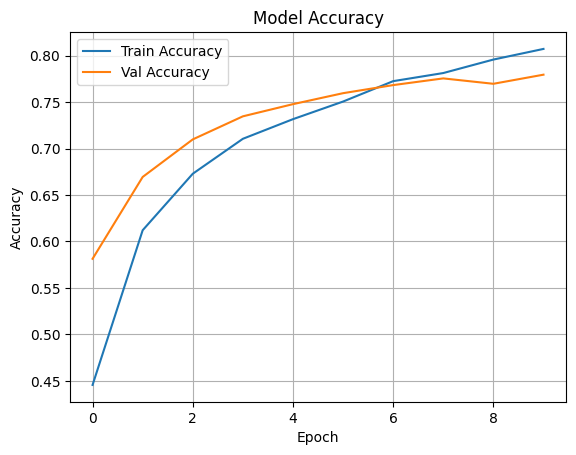

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step

🧾 Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1000
           1       0.89      0.90      0.89      1000
           2       0.72      0.64      0.68      1000
           3       0.61      0.58      0.60      1000
           4       0.72      0.75      0.73      1000
           5       0.73      0.63      0.67      1000
           6       0.77      0.89      0.82      1000
           7       0.82      0.82      0.82      1000
           8       0.89      0.86      0.88      1000
           9       0.82      0.89      0.86      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



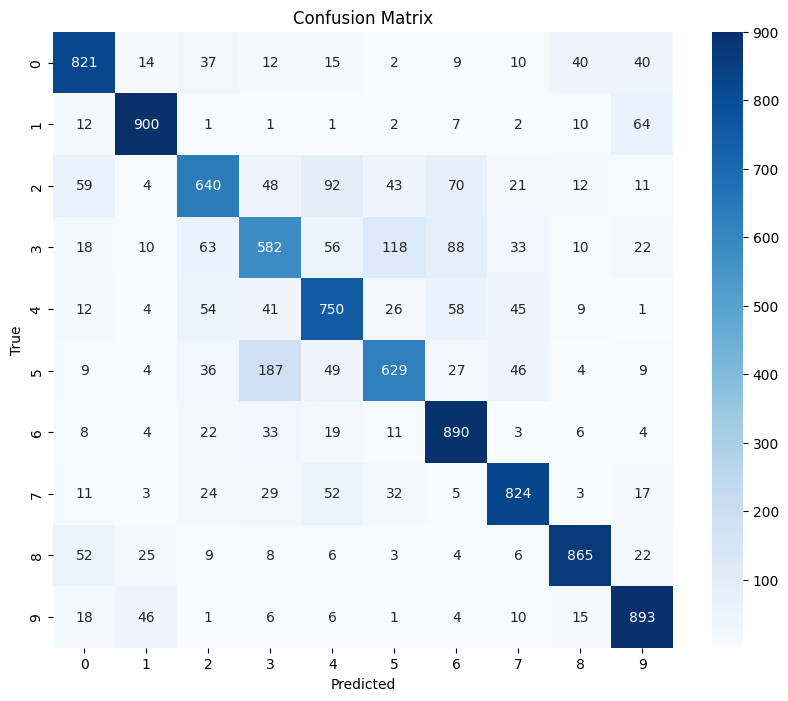

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(f"Training samples: {x_train.shape}, Test samples: {x_test.shape}")

x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

model = models.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = None

try:
    history = model.fit(x_train, y_train,
                        epochs=10,
                        batch_size=64,
                        validation_data=(x_test, y_test))
except KeyboardInterrupt:
    print(" Training manually stopped.")

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\n Test Accuracy:", test_acc)

if history:
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title("Model Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(" Accuracy plot skipped because training was interrupted.")

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("\n Classification Report:\n")
print(classification_report(y_true_classes, y_pred_classes))

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
